## <span style="color:blue">Code groups</span>

Identification codes are predominately from EU Marine Strategy Framework Directive (MSFD) Masterlist. 
[mcc.jrc.ec.europa.eu › documents](https://mcc.jrc.ec.europa.eu/documents/201702074014.pdf) Annex 8.1 - Master List of Categories of Litter Items. Codes were added for this project to increase the identification of items commonly found in Swiss freshwater systems. The complete list is in table below: additional codes. 


__What this does:__ This note book combines individual item codes to groups to best describe usage and possible sources. It is acknowledged that some items in a group contribute to a percentage rather than the whole sum.  Code grouping is a broad analysis method to evaluate the discarded materials found in water systems by economic sectors or physical properties. Items are also analysed independently in this report. The grouping is not finite and individual codes maybe added or removed. The grouping is derived from field observations and research to answer fundamental questions:

1. what is the item?

2. how is the item used?

3. how much do you find?

4. where did the item come from?

__When to use it:__ May be used to analyze a series of coded items related by use, source, material characteristics and other important variables:

1. population densities

2. infrastructure densities

3. waterway concentrations

4. seasonality

5. regional differences

6. previous and/or other current data

_resources/codegroups/images/20200824foamWalenstadt.jpg_

#### Tasks:add photos, sources

### <span style="color:blue">Lists of items grouped by use and/or industry for analysis </span>
Grouped item codes contains the following use or material description catagories:
1. wastewater: items released from water treatment plants includes items likely toilet flushed   
2. micro plastics (< 5mm): foam and plastic fragments and pre-production plastic resins
3. infrastructure: items related to construction and maintenance of all buildings, roads and water/power supplies 
4. food/drink: primarily single use plastic items related to consuming food and drinks outdoors  
5. agriculture: primarily industrial sheeting; mulch films, row coverings, polytunnels, greenhouse sheeting, soil fumigation films, bale wraps as well as hard plastics; agricultural fencing, plastic flower pots etc. 
6. tobacco: primarily cigarette filters includes all smoking related material 
7. recreation: fishing, hunting, boating and beach related objects, excludes food, drink and tobacco   
8. packaging non food/drink: packaging or wrapping material not identifiable as food, drink nor tobacco related  
9. plastic pieces: plastic or foam/plastic composite pieces greater than 0.5 cm
10. personal items: personal use related; accessories, hygiene and clothing
11. Unclassified: ungrouped item codes

In [1]:
# sys, file and nav packages:
import os
import datetime as dt
import csv, json

# math packages:
import pandas as pd
import numpy as np
from scipy import stats
import datetime as dt 


# charting:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker
import seaborn as sns
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML


# home brew utitilties
import resources.utility_functions as ut
def push_this_to_json(filename="", data=[]):
    with open(filename, "w") as a_file:
        json.dump(data, a_file)

# documenting
from IPython.display import Markdown as md

def make_table_grids(anax):
    anax.grid(False)
    anax.spines["top"].set_visible(False)
    anax.spines["right"].set_visible(False)
    anax.spines["bottom"].set_visible(False)
    anax.spines["left"].set_visible(False)
    return(anax)
def table_fonts(a_table, size=12):
    a_table.auto_set_font_size(False)
    a_table.set_fontsize(size)
    
# method to save
files_generated=[]
def add_output(a_name, a_tag, atype="table", fignum=0, a_list=files_generated):
    tableonefile = F"{project_directory}/{a_name}"
    files_generated.append({'tag':a_tag, 'number':fignum, 'file':tableonefile,'type':atype})
    plt.savefig(tableonefile, dpi=300)


    
# table kwargs
table_k = dict(loc="top left", bbox=(0,0,1,1), colWidths=[.5, .5], cellLoc='center')
tablecenter_k = dict(loc="top left", bbox=(0,0,1,1), cellLoc='center')
tabtickp_k = dict(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False)
title_k = {'loc':'left', 'pad':12, 'linespacing':1.5, 'fontsize':12}
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

table_num = 1

In [2]:
# the local file structure. The resources are located in the corresponding directory.
# the purpose and date should be included in the filename when saving results to output
# most_recent, survey_data, location_data, code_defs, stat_ent, geo_data, output = ut.make_local_paths()

In [3]:
# probably want to keep these... the works already done
# aggregated survey data
dfAgg = pd.read_csv("resources/results_with_land_use_2015.csv")
dfAgg['date'] = pd.to_datetime(dfAgg['date'])


# get your data:
dfCodes = pd.read_csv("resources/codes_with_group_names_2015.csv")

# beach data
dfBeaches = pd.read_csv("resources/beaches_with_land_use_rates.csv")

# code definitions

today = dt.datetime.now().date().strftime("%Y-%m-%d")

In [4]:
output = "output"
project_directory = ut.make_project_folder(output, 'code_groups')

## <span style="color:blue">Simplified code groupings </span>

Impactful litter reduction strategies should target the source of material. The simplest way to describe litter pollution is in terms of direct or indirect deposition. 

Direct relates to individual comportment on our near Swiss shorelines. Cigarette filters and candy, snack packaging remains one of the most common single use plastic item discarded directly in the water, on the shoreline or in very close proximity to Swiss water systems.

Indirect refers to material that is likely transported to sites by aeolian and especially fluvial processes; rivers, streams, canals, and drainage systems. These items likely represent a systematic loss where material is escaping pollution management practices. Media filters are a common item escaping directly from water treatment facilities as well as toilet flushed single use plastic items related to personal hygiene. Industrial plastic pre-preduction resin pellets are lost during transport of material or directly from plastic injection manufactures. Industrial pellets, media filters and cotton swab sticks have been identified along the shores of all Swiss lakes of study. 

Unclassified relates to items that are ambiguous in origin, rarely identified, or do not pertain to shoreline surveillance of Swiss water systems. Many of the non grouped items have a total value of 0 for all survey data included in this report. Notable exceptions are (G20) and (G23) plastic caps/lids unidentified which are found in significant quantities but use and origin are unknown. Glass or ceramic fragments >2.5cm (G208) is also unclassified in this report. Predominately ceramic pieces of unknown use or origin are identified frequently and in relatively high concentrations. The occurrence of ceramic fragments may be related to the sources of material for beach replenishing practices as well as natural transport and deposition processes rather than food, drink or other beach related activities. Identifiable glass drink bottles and pieces are classified as (G200) bottles and includes pieces, they are grouped with food and drink. 

### <span style="color:#008891">Simplified Grouping 1 </span>
1. Direct: items likely abandoned on or near survey site includes the following groups:
- food/drink
- tobacco
- recreation
- personal items
- packaging non food/drink

In [5]:
# kwargs for the abundance class
on_site = {
    "food and drink":"foodstuff.json",
    "tobacco":"tobac.json",
    "recreation":"recreation.json",    
    "packaging non food":"packaging.json",
    "personal items":"pi.json"    
}
# saving to .json
push_this_to_json(filename=F"{project_directory}/on_site", data=on_site)
# groups.append({"on_site":on_site})

### <span style="color:#008891">Simplified Grouping 2 </span>
1. Indirect: items likely transported to survey site includes the following groups:
- waste water
- micro plastics (< 5mm)
- infrastructure
- agriculture
- plastic pieces

In [6]:
# kwargs for the abundance class
transported = {
    "waste water": "wastewater.json" ,
    "micro plastics (< 5mm)":"codeListMicros.json",
    "infrastructure":"construction2.json",
    "agriculture":"ag2.json",
    "plastic pieces":"plasticpcs.json",
    
}
# saving to .json
push_this_to_json(filename=F"{project_directory}/transported", data=transported)
# groups.append({"transported":transported})

In [7]:
# kwargs for the abundance class
code_group2 = {
    "waste water": "wastewater.json" ,
    "micro plastics (< 5mm)":"codeListMicros.json",
    "infrastructure":"construction2.json",
    "food and drink":"foodstuff.json",
    "agriculture":"ag2.json",
    "tobacco":"tobac.json",
    "plastic pieces":"plasticpcs.json",
    "recreation":"recreation.json",    
    "packaging non food":"packaging.json",
    "personal items":"pi.json", 
    "unclassified": "nogroup.json"
}
# saving to .json
push_this_to_json(filename=F"{project_directory}/code_group2.json", data=code_group2)
# groups.append({"code_group2":code_group2})

### <span style="color:#008891">Micro plastic codes</span>

Micro codes are all micro plastics and foams from MSFD Master List of Categories of Litter Items Annex 8.1 items G103-G123. Not all codes have been identified in our data.
The objective of this project was to quantify observable litter which tends to be greater than 0.5 cm but the lower limit of natural visible detection when surveying a shore line is around 0.2 - 0.5 cm. Over the course of a survey, visible micro items are collected with the lager material and composition is generally identifiable. The IQAOALSW project did not include methods to specifically target items less than 5mm but all visible micro plastics collected during a survey were quantified, weighed and categorized using 20 codes (G103 - G123) available to classify plastics less than 5mm.

In [8]:
grouped = []
groups = {}

In [9]:
codesmicro=["G112", "G106", "G117", "G103", "G104", "G105", "G107", "G108", "G109", "G110", "G111", "G113", "G114", "G115", "G116", "G118", "G119", "G120", "G121", "G122", "G123"]
push_this_to_json(filename=F"{project_directory}/codeListMicros.json", data=codesmicro)
grouped = grouped + codesmicro
groups.update({x:'micro' for x in codesmicro})

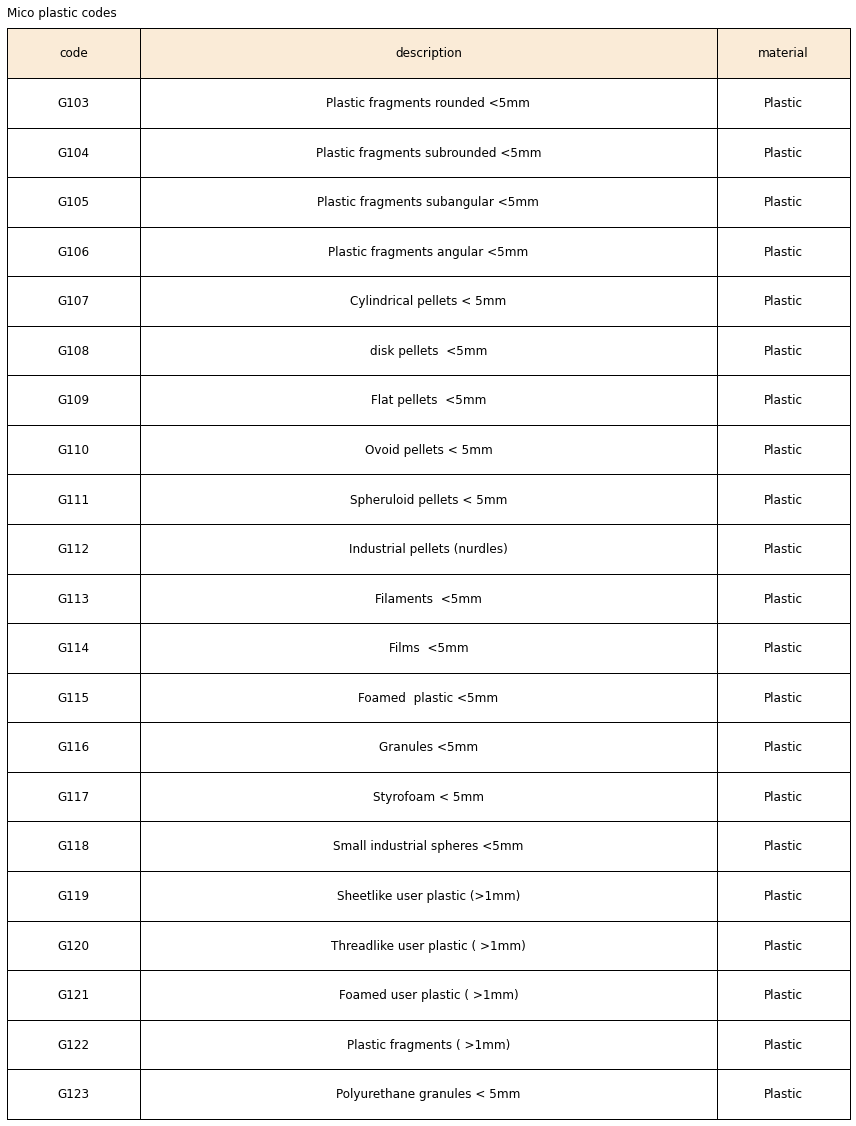

In [10]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(codesmicro)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title("Mico plastic codes", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Micro plastic fragments < 0.05cm"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Plastic and foam pieces of unknown origin</span>
Plastic fragments group (Gfrags for analysis) are all plastic or  foam/plastic composite pieces greater than 0.5 cm. Plastic pieces found along Swiss shorelines are predominately small, hard, highly fragmented pieces of a pigmented item. The original use and source is principally undetermined. Individual plastic pieces were quantified by material and size:



In [11]:
plasticpcs = [
    "G78",
    "G79",
    "G80",
    "G75", 
    "G76", 
    "G77" 
    ]
# saving to .json
push_this_to_json(filename=F"{project_directory}/plasticpcs.json", data=plasticpcs)
grouped = grouped + plasticpcs
# groups.append({"plasticpcs":plasticpcs})
groups.update({x:"plasticpcs" for x in plasticpcs})

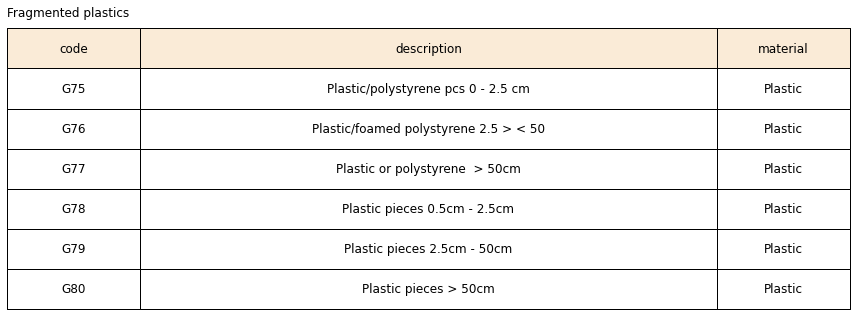

In [12]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(plasticpcs)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Fragmented plastics", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Plastic fragments of unknown use of origin"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Wastewater treatment codes</span>
Wastewater treatment codes includes items that may have been toilet flushed and released from a water treatment bypass or inadequate filtering for items such as cotton swabs. Note code (G98) includes diapers and wipes. Diapers are rarely found in Swiss water systems the quantities should be attributed to personal hygiene wipes. 

In [13]:

wastewater = [
    'G91',
    'G95',
    'G96',
    'G98',
    'G97',
    'G100',
    'G133',
    'G932',
    'G144'
]
# saving to .json
push_this_to_json(filename=F"{project_directory}/wastewater.json", data=wastewater)
grouped = grouped + wastewater

groups.update({x:'waste_water' for x in wastewater})

In [14]:
wwcodes = dfCodes[dfCodes.code.isin(wastewater)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

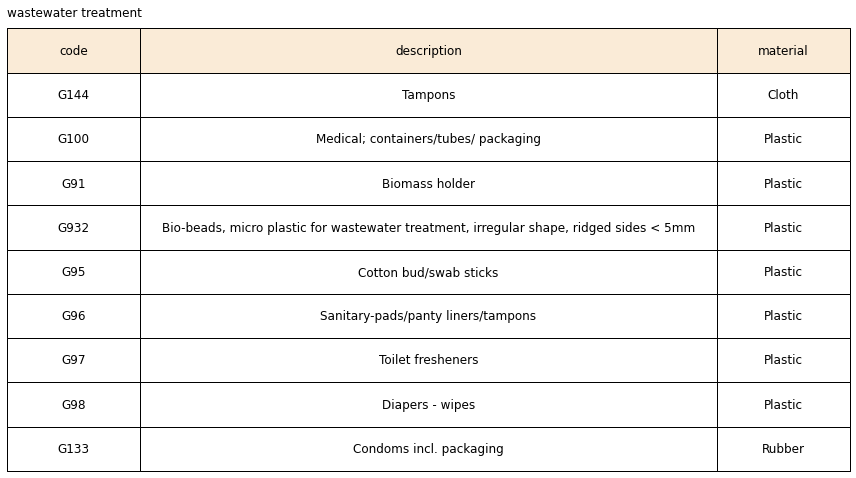

In [15]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(wastewater)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"wastewater treatment", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Items specific to wastewater treatment"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Recreation codes</span>
The recreational group includes fishing, hunting, boating and beach related objects, excludes food, drink and tobacco. Plastic shotgun cartridges (G70) are found in surprising numbers considering hunting is not allowed along public beaches and maybe a key indicator of travel distances through the water systems.

In [16]:
recreation = [
    'G32',
    'G43',
    'G48',
    'G49',
    'G50',
    'G49',
    'G51',
    'G52',
    'G53',
    'G54',
    'G53',
    'G55',
    'G56',
    'G57',
    'G58',
    'G59',
    'G60',
    'G61',
    'G63',
    'G70',
    'G73',
    'G86',
    'G92',
    'G94',
    'G206',
    'G132',
    'G142',
    'G143',
    'G155',
    'G164',
    'G167',
    'G182',
    'G183',
    'G125',
    'G126',
    'G11',
    'G213',
    'G904',
    'G940'
  ]
# saving to .json
push_this_to_json(filename=F"{project_directory}/recreation.json", data=recreation)
grouped = grouped + recreation
# groups.append({"recre":recreation})
groups.update({x:'recre' for x in recreation})


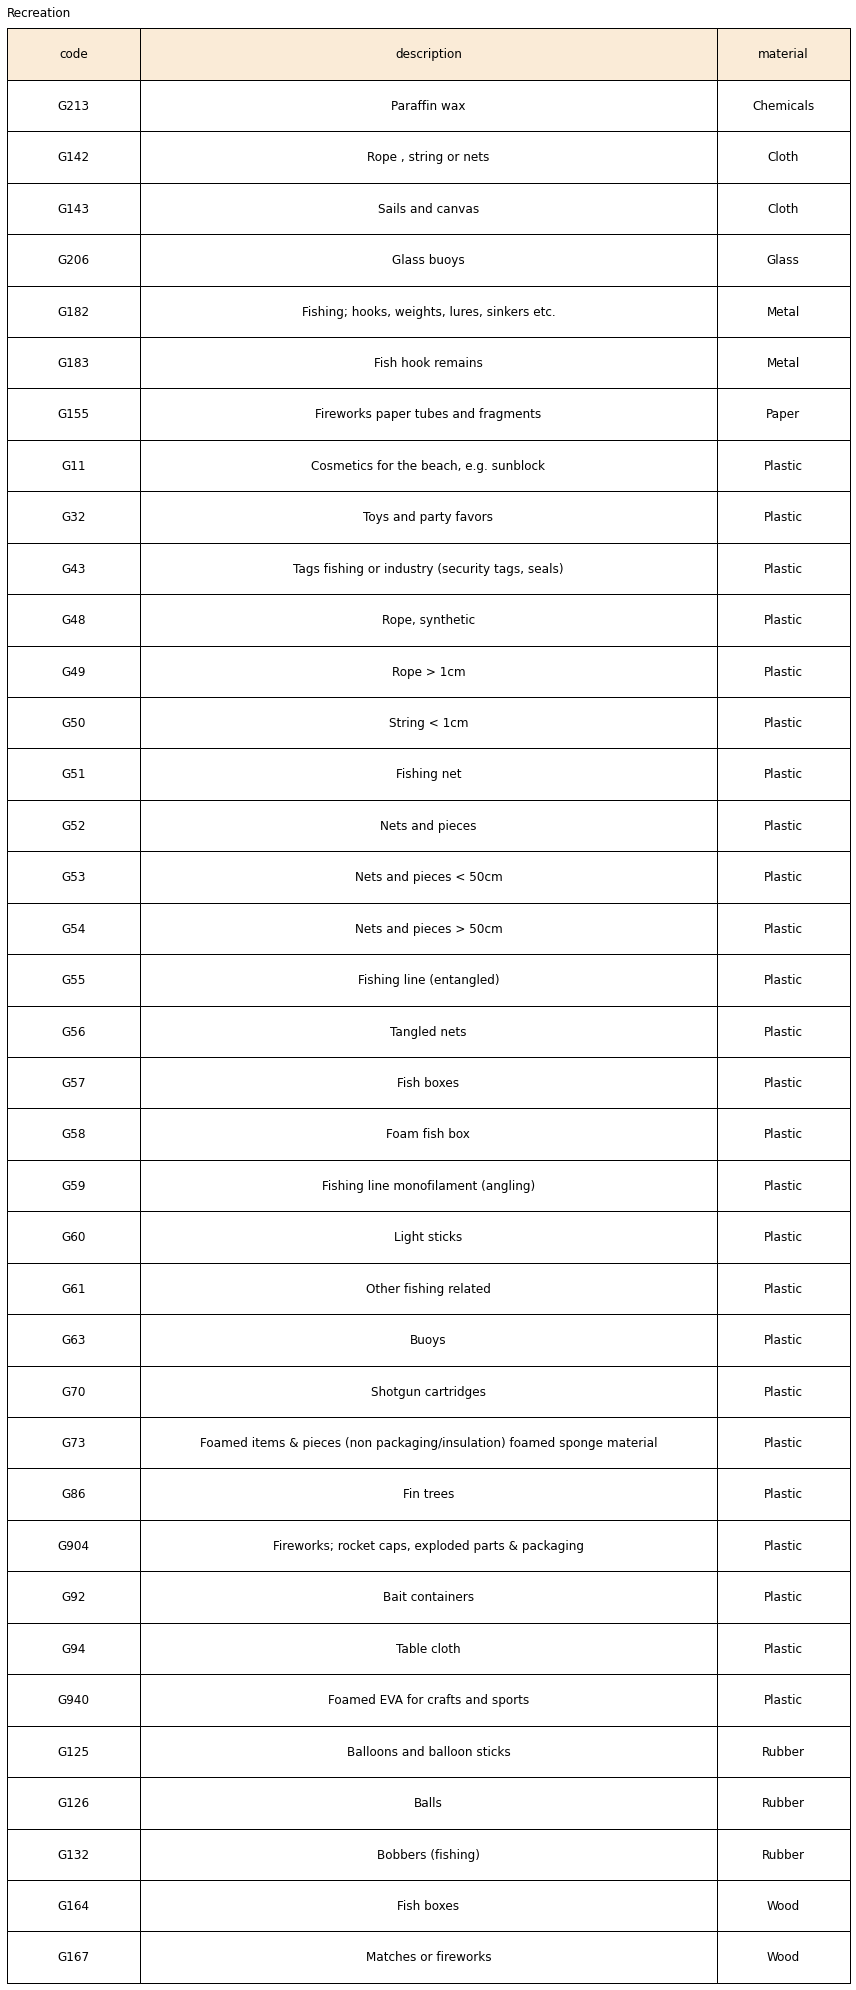

In [17]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(recreation)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Recreation", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Fishing, hunting, boating and beach related items"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Food and drink codes</span>
Includes all materials related to eating and drinking. The greatest quantities are single use plastics (SUP) items related to  outdoor or to go consumption. The most prevalent SUP are packaging for candy and snacks items (G30).

In [18]:
foodstuff = [
    'G1',
    'G8',
    'G7',
    'G10',
    'G21',
    'G24',
    'G30',
    'G151',
    'G175',
    'G176',
    'G177',
    'G178',
    'G179',
    'G181',
    'G200',
    'G201',
    'G203',
    'G150',
    'G153',
    'G159',
    'G165',
    'G31',
    'G33',
    'G34',
    'G35',
    'G906',
    'G907',
    'G926',
    'G938'
    ]
# saving to .json
push_this_to_json(filename=F"{project_directory}/foodstuff.json", data=foodstuff)
grouped = grouped + foodstuff
# groups.append({"food":foodstuff})
groups.update({x:"food" for x in foodstuff})

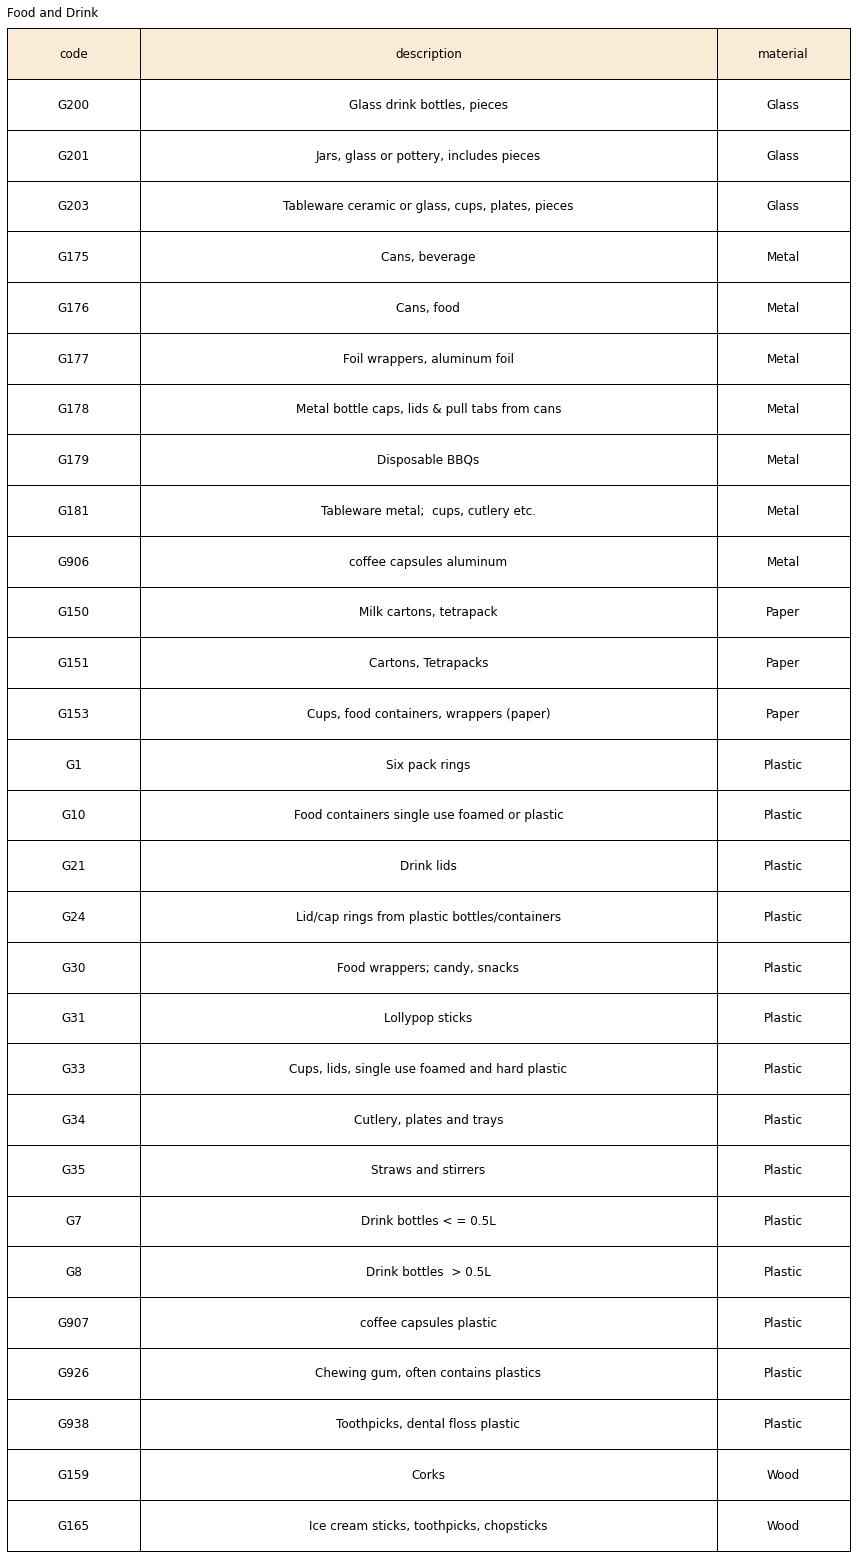

In [19]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(foodstuff)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Food and Drink", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Food and drink related items"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Agriculture codes</span>
Agriculture for grouping analysis is the production for commercial purposes of crops, livestock, livestock products, forest crops, nursery and greenhouse products.

In [20]:
ag2 = [
    "G36",
    "G936",
    "G937",
    "G13",
    "G18", 
    "G41",
    "G65",
    "G67",
    "G90",
    "G140",
    "G161",
    "G168",
    "G170",
    "G171",
    "G172",
    "G191",
    "G192",
    "G934",
    "G943"
]
# saving to .json
push_this_to_json(filename=F"{project_directory}/ag2.json", data=ag2)
grouped = grouped + ag2
# groups.append({"ag2":ag2})
groups.update({x:"ag2" for x in ag2})

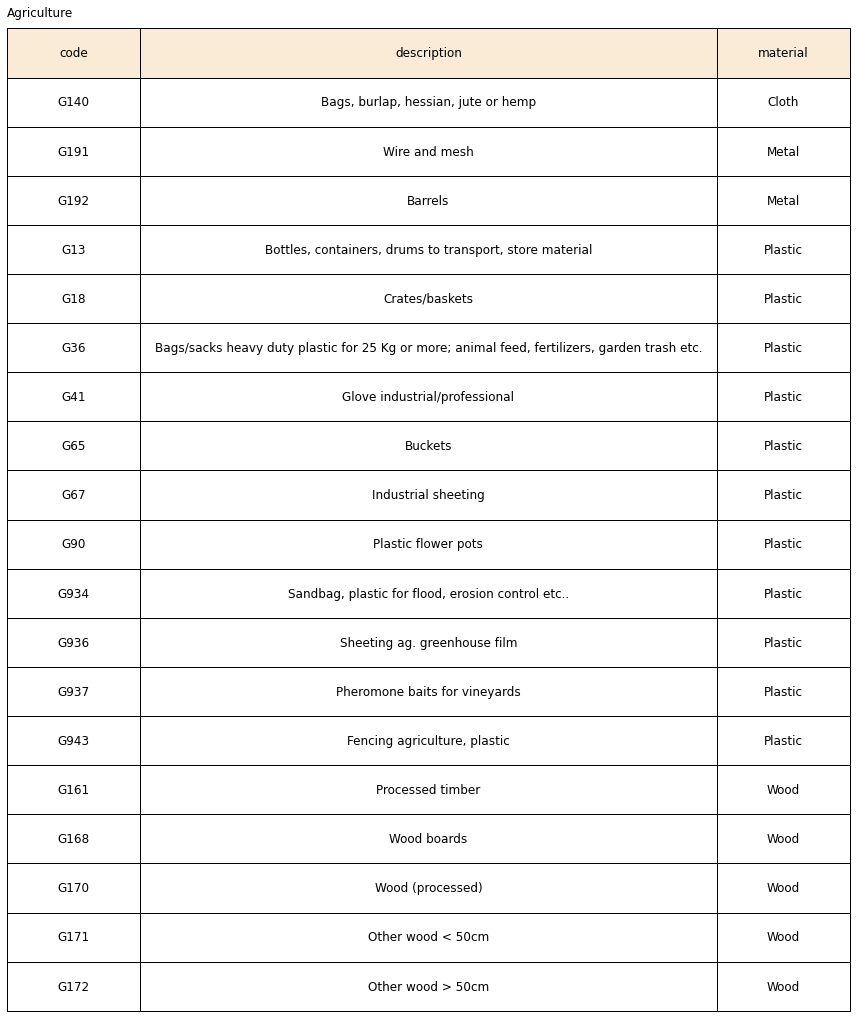

In [21]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(ag2)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Agriculture", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Agriculture"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Infrastructure codes</span>
Infrastructure relates to all forms of construction, renovations and maintenance of public and private structures including roads, bridges and ports as well as power and water supplies. Codes G909-G912 were created to differentiate foams used for insulation from packaging foams. The data is aggregated to parent codes G74, G81 and G82.

In [22]:

construction2= [
            'G9',
            'G204',
            'G187',
            'G919',
            'G65',
            'G17',
            'G22',
            'G66',
            'G68',
            'G69',
            'G72',
            'G74',
            'G81',
            'G82',
            'G83',
            'G87',
            'G89',
            'G93',
            'G160',
            'G162',
            'G166',
            'G169',
            'G174',
            'G186',
            'G188',
            'G189',
            'G190',
            'G194',
            'G197',
            'G198',
            'G199',
            'G214',
            'G908',
            'G909',
            'G910',
            'G911',
            'G912',
            'G921',
            'G927',
            'G931'
]
# saving to .json
push_this_to_json(filename=F"{project_directory}/construction2.json", data=construction2)
grouped = grouped + construction2
groups.update({x:"construction2" for x in construction2})

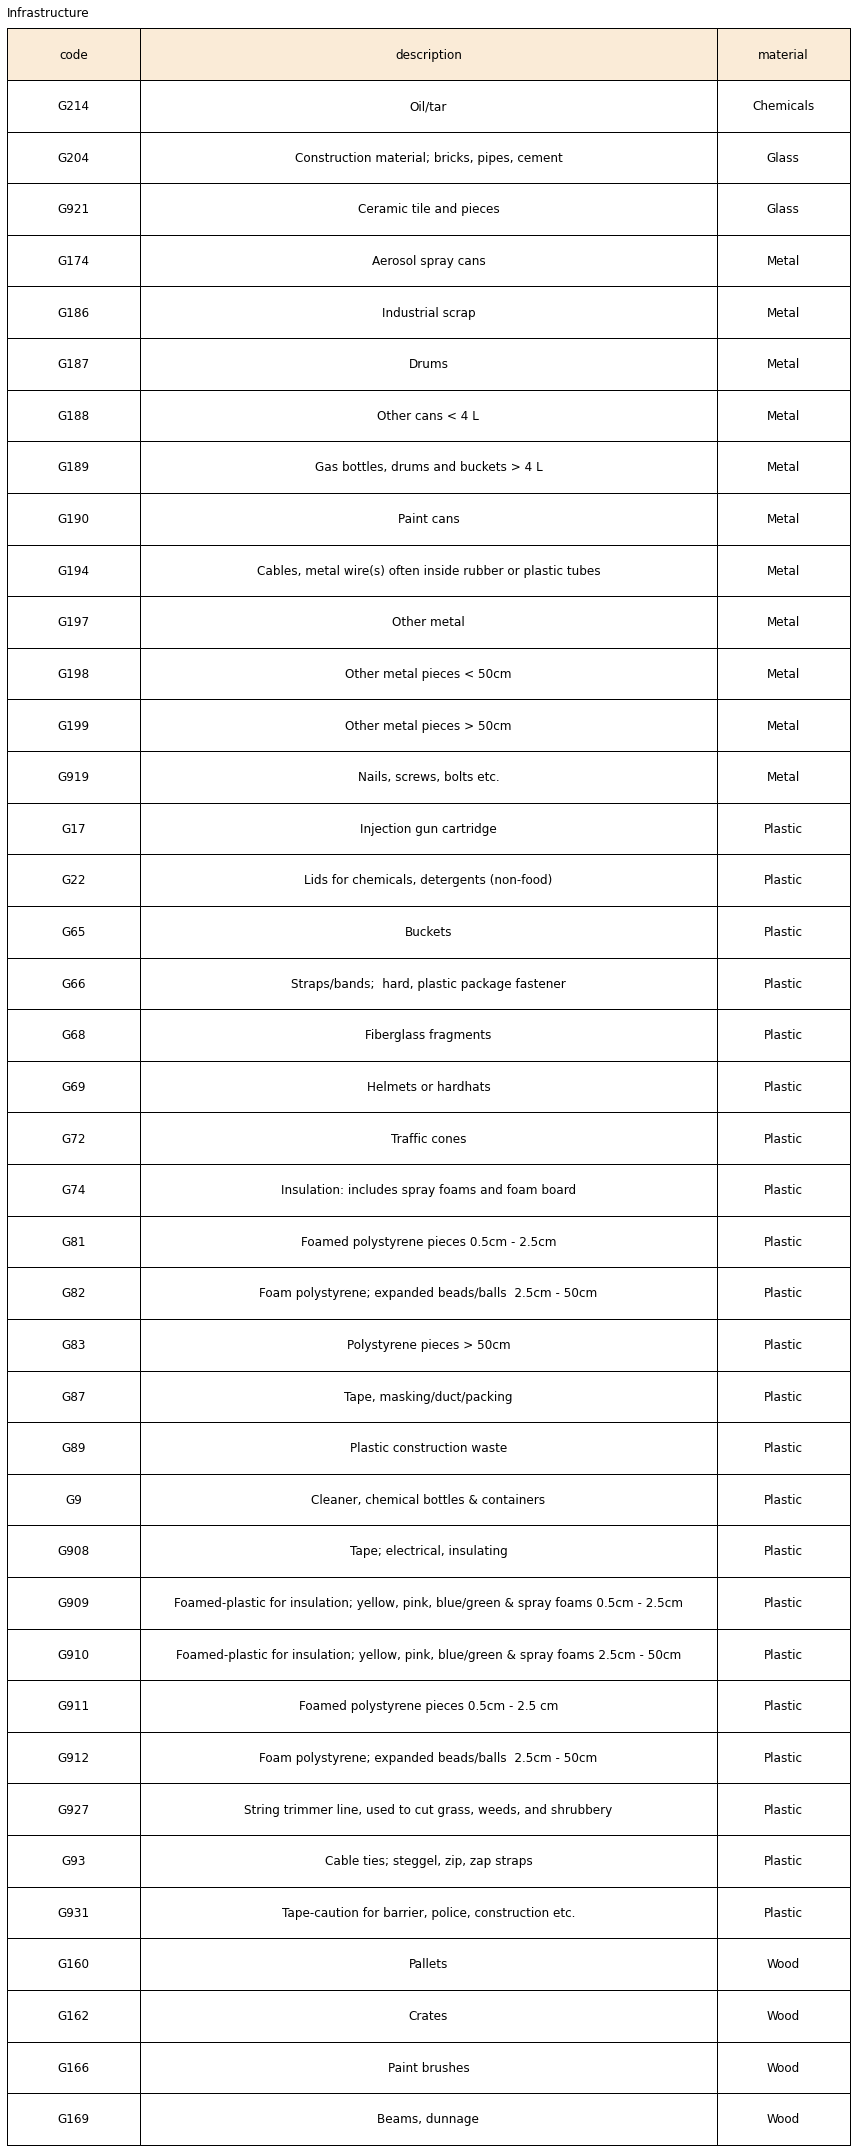

In [23]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(construction2)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Infrastructure", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Items related to construction industry"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Tobacco codes</span>
All tobacco related items.

In [24]:
tobac = [
    'G25',
    'G26',
    'G27',
    'G152'
    ]
# saving to .json
push_this_to_json(filename=F"{project_directory}/tobac.json", data=tobac)
grouped = grouped + tobac

groups.update({x:"tobaco" for x in tobac})

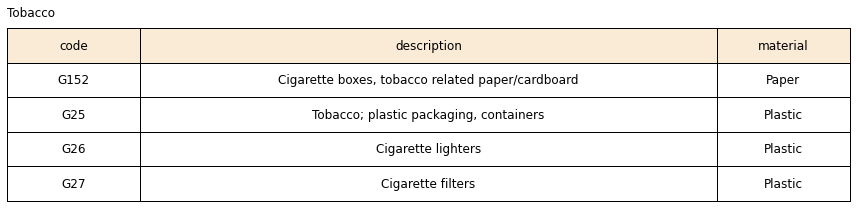

In [25]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(tobac)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Tobacco", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Tobacco related items"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Personal Items</span>
Includes accessories, hygiene and clothing related items lost or discarded. Includes pandemic related items such as face masks as well as beach related items such as sunglasses and clothing.

In [26]:
pi = [
    'G211',
    'G84',
    'G99',
    'G101',
    'G102',
    'G127',
    'G131',
    'G135',
    'G136',
    'G137',
    'G138',
    'G139',
    'G37',
    'G39',
    'G40',
    'G145',
    'G28',
    'G29',
    'G154',
    'G195',
    'G900',
    'G901',
    'G902',
    'G903',
    'G905',
    'G913',
    'G914',
    'G915',
    'G918',
    'G916',
    'G933',
    'G929',
    'G939',
    'G945',
    'G923',
    'G928',
    'G12',
    'G71',
    'G88',
    'G935',
    'G930'
    ]
# saving to .json
push_this_to_json(filename=F"{project_directory}/pi.json", data=pi)
grouped = grouped + pi
# groups.append({"pi":pi})
groups.update({x:"pi" for x in pi})


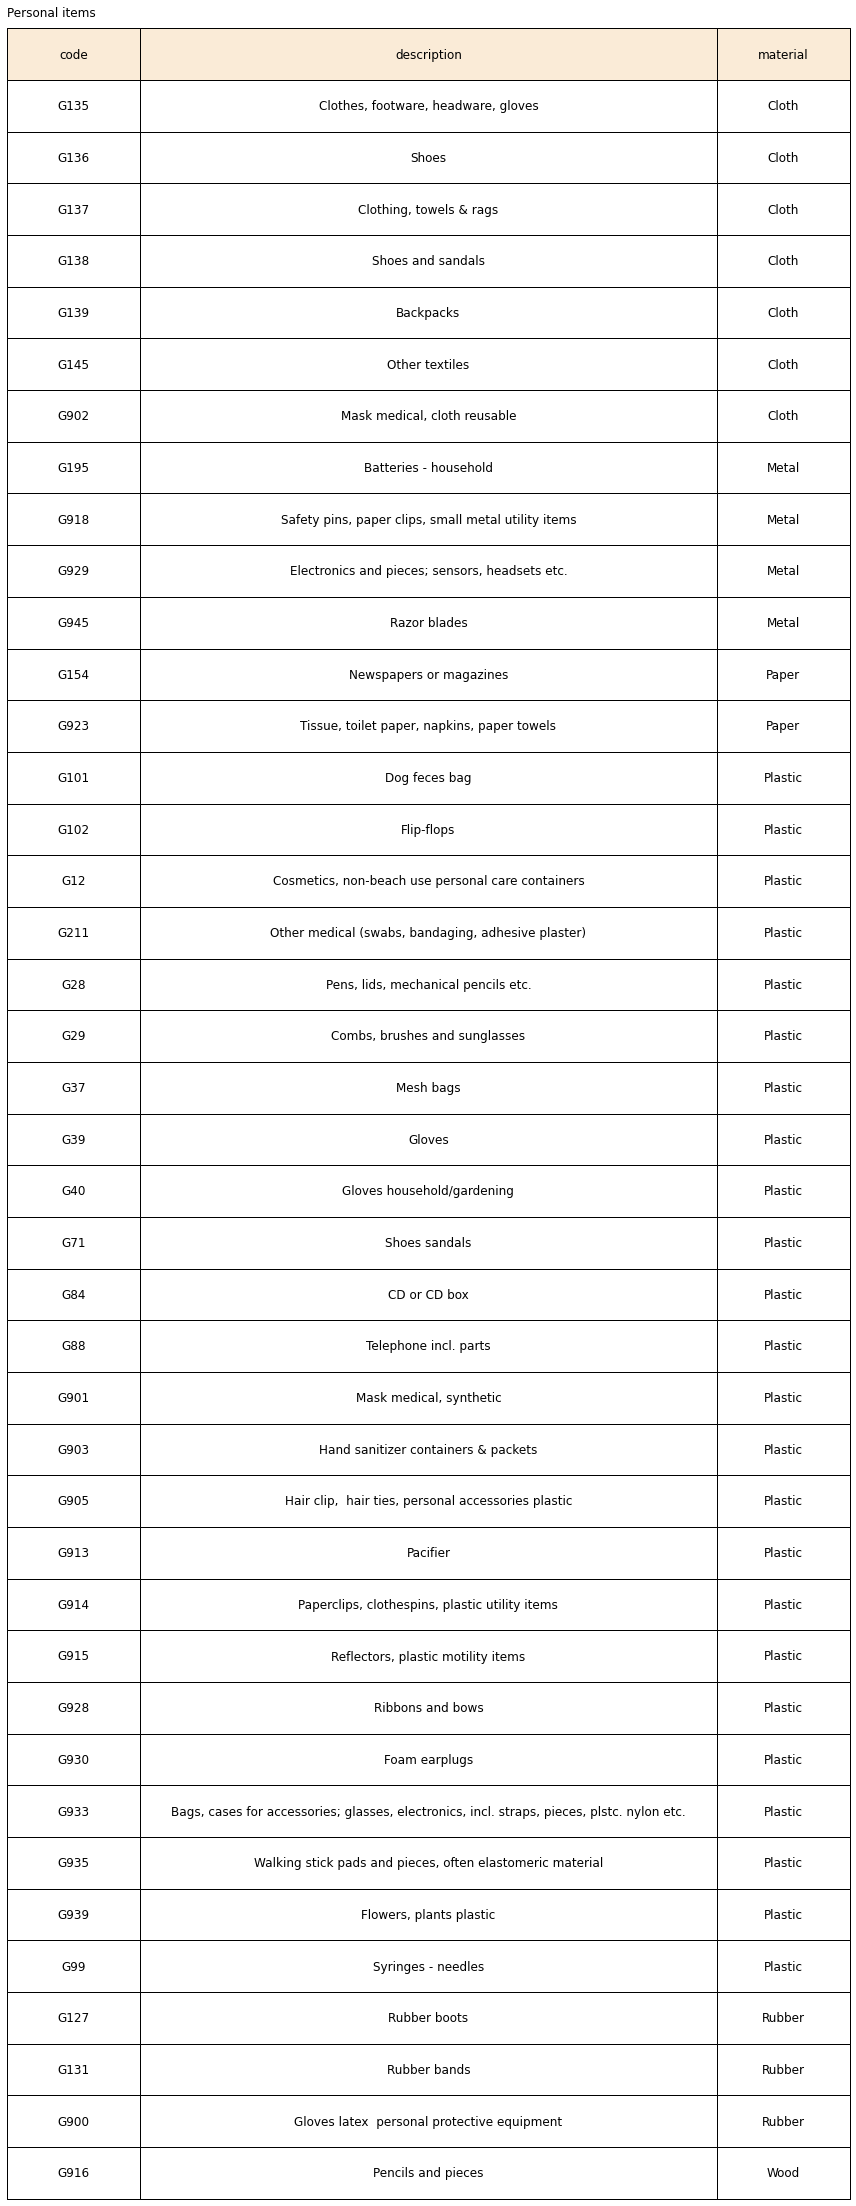

In [27]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(pi)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Personal items", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Personal use related items"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Packaging not related to food, drink, tobacco or unknown origin.</span>
All  packaging or wrapping material including paper, plastic and metal not identified as food, drink nor tobacco related. The packaging non food/drink group includes (G941) a code added  to differentiate thin packaging films from thicker industrial sheeting. The plastic packaging films (G941) are classified as non food, drink, nor tobacco related. Commonly the films are highly deteriorated and fragmented making the original use and source difficult to determine.


In [28]:
packaging = [
    "G23",
    "G2",
    "G146",
    "G148",
    "G149", 
    "G3", 
    "G20",
    "G4",
    "G6",
    "G147",
    "G922",
    "G941",
    "G156",
    "G157",
    "G158",
    "G925",
    "G5"
    ]
# saving to .json
push_this_to_json(filename=F"{project_directory}/packaging.json", data=packaging)
grouped = grouped + packaging
# groups.append({"packaging":packaging})
groups.update({x:"packaging" for x in packaging})

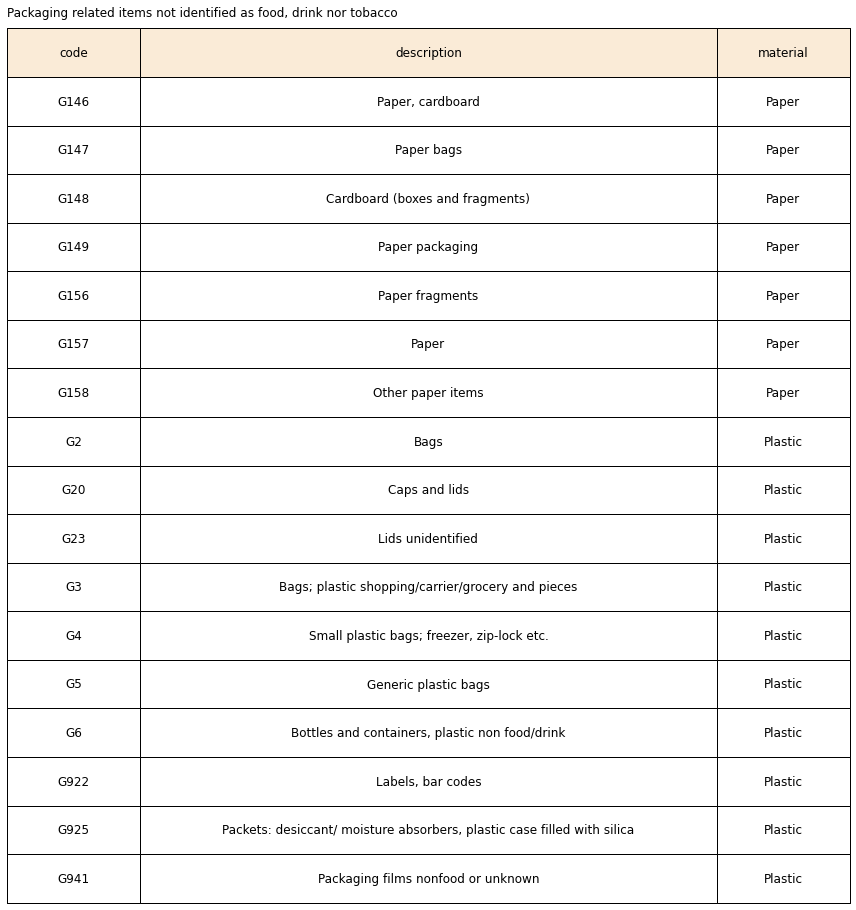

In [29]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(packaging)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Packaging related items not identified as food, drink nor tobacco", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Packaging related items not identified as food, drink or tobacco"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Unclassified item</span>
The non grouped codes are predominately items that are ambiguous in origin, rarely identified, or do not pertain to shoreline surveillance of Swiss water systems. Many of the non grouped items have a total value of 0 for all survey data included in this report. 

In [30]:
### <span style="color:#008891">Recreation codes</span>
print("\ncodes grouped:\n")
print(grouped)
print("\ncodes not grouped:\n")
print(dfCodes[~dfCodes.code.isin(grouped)].code.values)
print("\ncodes not grouped abrev list:\n")


codes grouped:

['G112', 'G106', 'G117', 'G103', 'G104', 'G105', 'G107', 'G108', 'G109', 'G110', 'G111', 'G113', 'G114', 'G115', 'G116', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G78', 'G79', 'G80', 'G75', 'G76', 'G77', 'G91', 'G95', 'G96', 'G98', 'G97', 'G100', 'G133', 'G932', 'G144', 'G32', 'G43', 'G48', 'G49', 'G50', 'G49', 'G51', 'G52', 'G53', 'G54', 'G53', 'G55', 'G56', 'G57', 'G58', 'G59', 'G60', 'G61', 'G63', 'G70', 'G73', 'G86', 'G92', 'G94', 'G206', 'G132', 'G142', 'G143', 'G155', 'G164', 'G167', 'G182', 'G183', 'G125', 'G126', 'G11', 'G213', 'G904', 'G940', 'G1', 'G8', 'G7', 'G10', 'G21', 'G24', 'G30', 'G151', 'G175', 'G176', 'G177', 'G178', 'G179', 'G181', 'G200', 'G201', 'G203', 'G150', 'G153', 'G159', 'G165', 'G31', 'G33', 'G34', 'G35', 'G906', 'G907', 'G926', 'G938', 'G36', 'G936', 'G937', 'G13', 'G18', 'G41', 'G65', 'G67', 'G90', 'G140', 'G161', 'G168', 'G170', 'G171', 'G172', 'G191', 'G192', 'G934', 'G943', 'G9', 'G204', 'G187', 'G919', 'G65', 'G17', 'G22', 'G66

In [31]:
ng=dfCodes[~dfCodes.code.isin(grouped)]

figname = F"workinglist.csv"
filename=F"{output}/code_groups/{figname}"
ng.to_csv(filename, index=None) 

In [32]:
ng.code.unique()


array(['G212', 'G141', 'G202', 'G205', 'G207', 'G208', 'G209', 'G210',
       'G917', 'G180', 'G184', 'G185', 'G193', 'G196', 'G124', 'G14',
       'G15', 'G16', 'G19', 'G38', 'G42', 'G44', 'G45', 'G46', 'G47',
       'G62', 'G64', 'G700', 'G85', 'G942', 'G944', 'G128', 'G129',
       'G130', 'G134', 'G998', 'G999', 'G163', 'G173', 'Gfrags', 'Gfoam'],
      dtype=object)

In [33]:

# saving to .json
push_this_to_json(filename=F"{project_directory}/nogroup.json", data=list(ng.code.unique()))

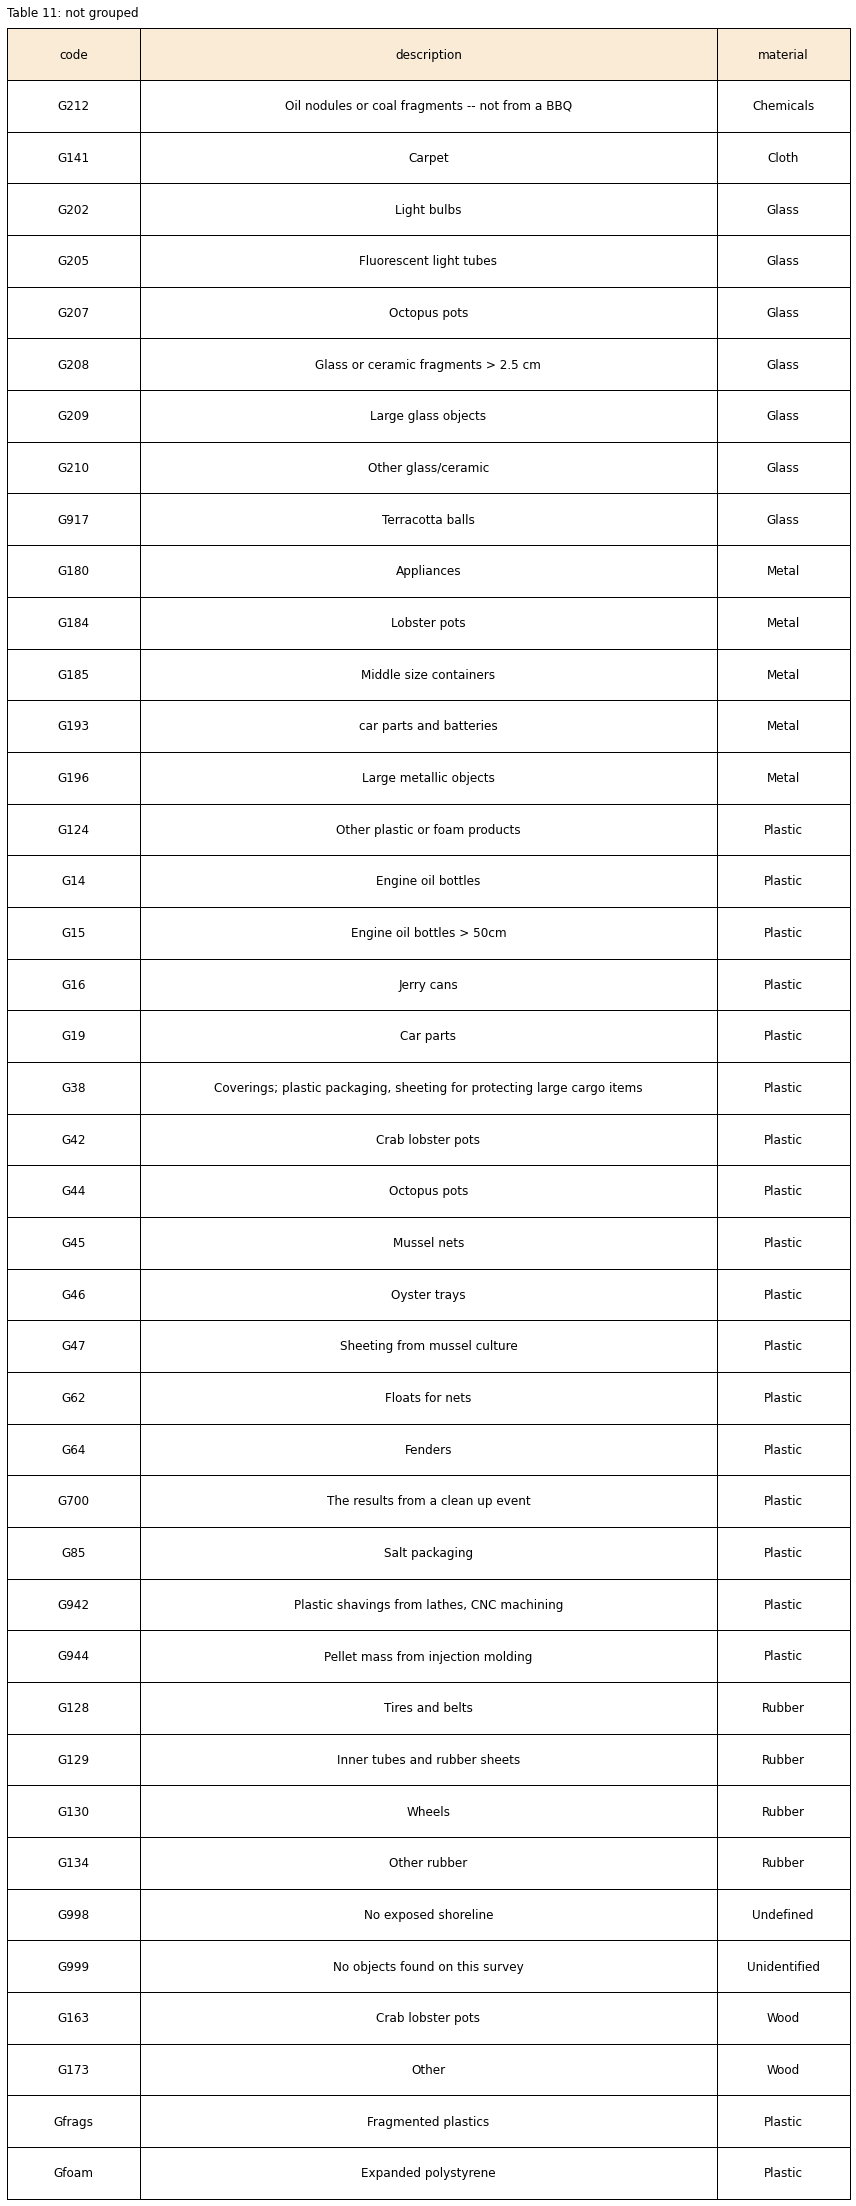

In [34]:
# make adjustments to table kwargs:
wwcodes = ng[['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: not grouped", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Ungrouped items"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Added codes</span>
To increase the identification, quantification and possible sourcing of items found in Swiss water systems the IQAOLSW project includes several important modifications to the original MSFD codes as well as an inclusion of 43 additional codes. The additional codes allow for data analyse at lower spatial scales, to capture regional data in Switzerland for example;(G937) plastic pheromone baits are commonly used in wine growing regions. The added codes begin with G900 and end with G999 and are linked to the MSFD master list using parent codes.


In [35]:
addcodes = [
    "G900", 
    "G901", 
    "G902", 
    "G903", 
    "G904", 
    "G905",
    "G906", 
    "G907", 
    "G908", 
    "G909", 
    "G910", 
    "G911", 
    "G912", 
    "G913", 
    "G914", 
    "G915", 
    "G916", 
    "G917", 
    "G918", 
    "G919", 
    "G920", 
    "G921", 
    "G922", 
    "G923", 
    "G925", 
    "G926", 
    "G927", 
    "G928", 
    "G929", 
    "G930",
    "G931",
    "G932",
    "G933",
    "G934",
    "G935",
    "G936",
    "G937",
    "G938",
    "G939",
    "G940",
    "G941",
    "G942",
    "G943",
    "G944",
    "G945"
]
push_this_to_json(filename=F"{project_directory}/addcodes.json", data=addcodes)
grouped = grouped + addcodes
groups.update({x:'addcodes' for x in addcodes})

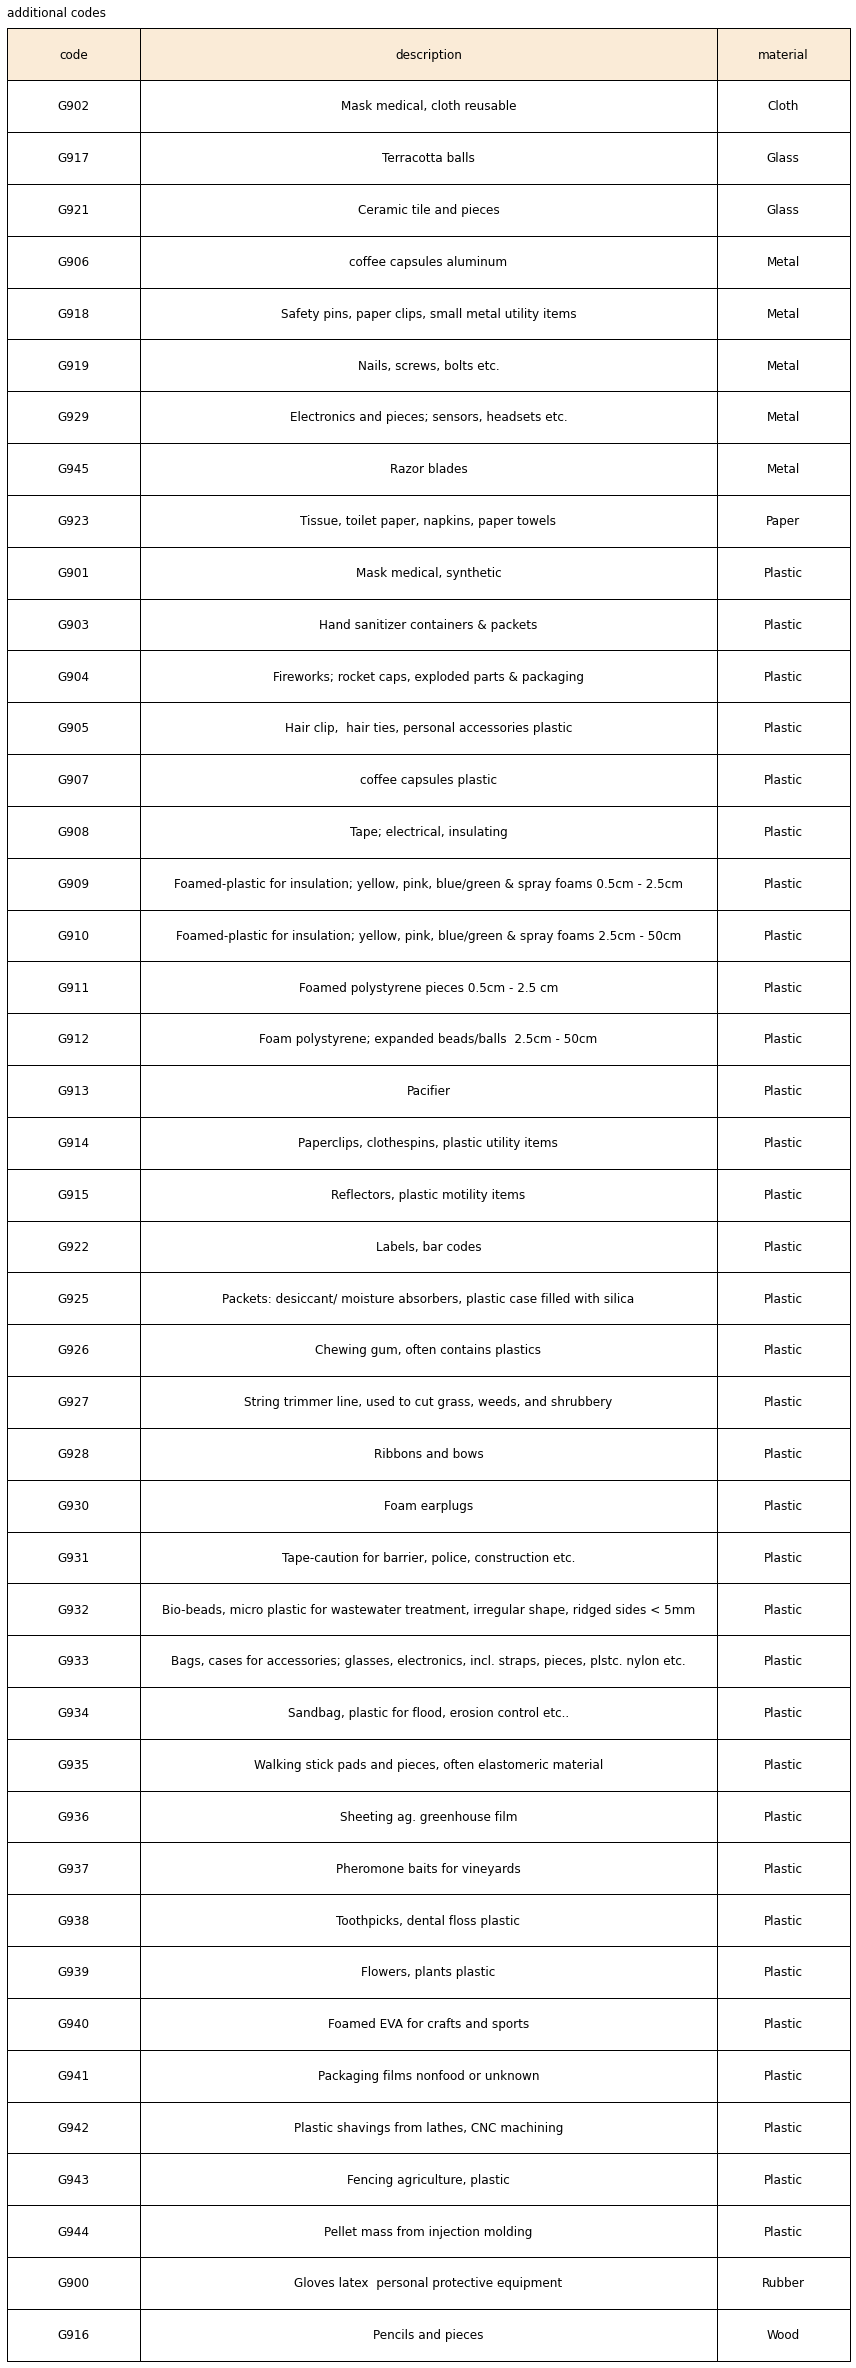

In [36]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(addcodes)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
# ax.set_title(F"Table {table_num}: micro plastics < 5mm", **title_k)
ax.set_title(F"additional codes", **title_k)

plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="additional codes to identifiy common items found in Swiss water bodies"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:blue">Codes no id</span>

In [37]:

hmm = dfAgg.copy()
hmm = hmm[["code","quantity"]].groupby("code", as_index=False).quantity.sum()

found = hmm[hmm.quantity > 0].code.unique()

ahh=[code for code in dfCodes.code if code not in found]


# saving to .json
push_this_to_json(filename=F"{project_directory}/codeNotfound.json", data=ahh)

# construction codes that have not been identified
[code for code in construction2 if code in ahh]

['G187', 'G69', 'G72', 'G169', 'G189', 'G909', 'G910', 'G911', 'G912']

In [38]:
dfCodes[dfCodes.code.isin(ahh)]


,code,material,description,source,source_two,source_three,parent_code,direct,single_use,micro,ospar_code,groupname
0,G212,Chemicals,Oil nodules or coal fragments -- not from a BBQ,Undefined,Where does it come from,none,Parent code,False,False,False,none,not classified
21,G206,Glass,Glass buoys,Fishing,Where does it come from,NaN,Parent code,True,False,False,NaN,recreation
24,G209,Glass,Large glass objects,Undefined,Where does it come from,NaN,Parent code,True,False,False,NaN,not classified
38,G184,Metal,Lobster pots,Fishing,Where does it come from,NaN,Parent code,True,False,False,NaN,not classified
41,G187,Metal,Drums,Packaging,Where does it come from,NaN,Parent code,True,False,False,NaN,infrastructure
43,G189,Metal,"Gas bottles, drums and buckets > 4 L",Packaging,Where does it come from,none,Parent code,True,False,False,none,infrastructure
46,G192,Metal,Barrels,Undefined,Where does it come from,NaN,Parent code,True,False,False,NaN,agriculture
86,G110,Plastic,Ovoid pellets < 5mm,Industry,Where does it come from,Indirect,Parent code,True,False,True,none,micro plastics (< 5mm)
97,G120,Plastic,Threadlike user plastic ( >1mm),Undefined,Where does it come from,NaN,Parent code,True,False,False,NaN,micro plastics (< 5mm)
98,G121,Plastic,Foamed user plastic ( >1mm),Undefined,Where does it come from,NaN,Parent code,True,False,False,NaN,micro plastics (< 5mm)


In [39]:
dfCodes['source_two'] = 'unk'

def assgin_a_group(x,groups):
    try:
        send = groups[x]
    except:
        send = 'unk'
    return send
    
    
for group in groups:
    dfCodes['source_two'] = dfCodes.code.map(lambda x: assgin_a_group(x,groups))
dfCodes.groupby('source_two').code.count()

source_two
addcodes         44
ag2              14
construction2    31
food             25
micro            21
packaging        14
pi               23
plasticpcs        6
recre            35
tobaco            4
unk              38
waste_water       8
Name: code, dtype: int64

In [40]:
#transported = [*codesmicro, *wastewater, *ag2, *construction2]
# another way to make a list of grouped codes

#### Thanks for visiting

if not contact shannon@hammerdirt.ch

In [41]:
dfCodes[dfCodes.source_two == 'cons']
figname = F"codes_with_groups.csv"
filename=F"{output}/code_groups/{figname}"
dfCodes.to_csv(filename, index=None) 

In [42]:
author = "shannon@hammerdirt.ch"
my_message = "fun is outside"
print(F"\nProduced by: {author}\nDate: {today}\n\n{my_message}")


Produced by: shannon@hammerdirt.ch
Date: 2021-08-10

fun is outside
